# Neural Network with Sigmoid Activation Function in both Output layer and Hidden Layer with Two Outputs For Binary Classification 

In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
import pprint as pp

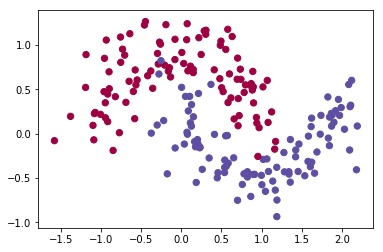

In [2]:
np.random.seed(123)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [3]:
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

In [4]:
def  sigmoidPrime(t):
     return (1 / (1 + np.exp(-t)))*(1-1 / (1 + np.exp(-t)))

In [5]:
def cross_entropy_Loss(model):
    w1= model['w1']
    w2= model['w2']
    z1=np.dot(X,w1)
    a1=sigmoid(z1)
    np.random.seed(0)
    w2=np.random.randn(4, 2)
    z2=np.dot(a1,w2)
    a2=sigmoid(z2)
    probit = a2 / np.sum(a2, axis=1, keepdims=True)
    return cross_entropy_Loss

In [6]:
loss_history=[]
def NN_Model(max_iter,learning_rate,nn_neuron):
    m=y.shape[0]
    np.random.seed(123)
    InputLayer=X.shape[1]
    n_HiddenLayer=nn_neuron
    OutputLayer=2
    w1=np.random.randn(InputLayer, nn_neuron)
    w2=np.random.randn(nn_neuron, OutputLayer)
    
    for i in range(0,max_iter):
        z1=np.dot(X,w1)
        a1=sigmoid(z1)
        z2=np.dot(a1,w2)
        a2=sigmoid(z2)
        probit = a2/np.sum(a2, axis=1, keepdims=True)
        probit = a2/np.sum(a2, axis=1, keepdims=True)
        cross_entropy=-np.log(probit[range(m), y])
        cross_entropy=np.sum(cross_entropy)/m
        delta=probit
##delta=delta-1 ## Below expression is similar to this one    
        delta[range(len(X)), y] -=1
        djdw2=np.dot(a1.T,delta)
## djdw2.shape,w2.shape **** Dimensions Need to be same
## Calcultaing with djdw1
        delta1=np.dot(delta,w2.T)
        delta2=np.multiply(delta1,sigmoidPrime(z1))
        djdw1=np.dot(X.T,delta2)
    

        w1=w1-learning_rate*djdw1
        w2=w2-learning_rate*djdw2
    
# Assign new parameters to the model
        model={}
        model = {'cross entropy Loss':cross_entropy,'w1': w1,'w2': w2}
        
        ## Saving all the cost into loss_history list
        loss_history.append(cross_entropy)
        if i%400 ==0:
            print('cross entropy Loss',cross_entropy,'\n','w1',w1,'\n','w2','\n',w2)
            print('----------------------------------------------------------------')
        
#        
#            print("Loss is:",cross_entropy,'\n',"Print Model:",model)
    return model

In [7]:
build=NN_Model(max_iter=1000,learning_rate=.001,nn_neuron=5)

cross entropy Loss 0.8449245896289141 
 w1 [[-1.0815278   0.98165749  0.28313455 -1.50637457 -0.58781133]
 [ 1.64833866 -2.41885554 -0.42900077  1.26604601 -0.86126838]] 
 w2 
 [[-0.66017783 -0.11341729]
 [ 1.45290099 -0.60041336]
 [-0.46133486 -0.41699837]
 [ 2.2248065   2.16790967]
 [ 0.9969855   0.39325479]]
----------------------------------------------------------------
cross entropy Loss 0.31944430512651606 
 w1 [[-0.96418898  0.92334447  0.84770673 -1.01995272 -1.03182634]
 [ 3.02430755 -3.23317363 -2.23294905  3.06894715 -0.22084799]] 
 w2 
 [[ 1.99391438 -2.7675095 ]
 [-2.06205946  2.91454709]
 [-2.65583982  1.77750659]
 [ 4.84553789 -0.45282172]
 [ 0.87689191  0.51334838]]
----------------------------------------------------------------
cross entropy Loss 0.31395694347853803 
 w1 [[-0.88937978  0.91720481  0.73929956 -0.90723239 -1.01080644]
 [ 3.20334416 -3.38993216 -2.51869273  3.26750494 -0.1939419 ]] 
 w2 
 [[ 2.19421468 -2.9678098 ]
 [-2.53501301  3.38750064]
 [-3.089510

Text(0,0.5,'cost')

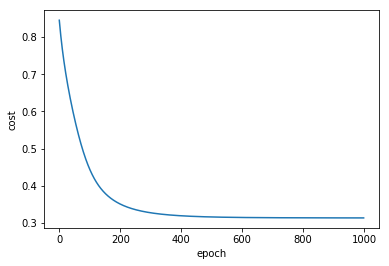

In [8]:
### Creating Cost_history vs Number of iterations 
plt.plot(loss_history)
plt.xlabel('epoch')
plt.ylabel('cost')

In [9]:
CrossEntropy=build['cross entropy Loss']
CrossEntropy

0.31370789894794

In [10]:
def predict(build, X):
    W1= build['w1']
    W2=build['w2']
    z1=np.dot(X,W1)
    a1=sigmoid(z1)
    z2=np.dot(a1,W2)
    a2=sigmoid(z2)
    probit = a2/np.sum(a2, axis=1, keepdims=True)
    return np.argmax(probit, axis=1)

In [11]:
## Result After NN
y_pred= predict(build, X)

In [12]:
df=pd.DataFrame({'Actual':y, 'Predicted':y_pred})  
df.head(10)

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,1,0
6,1,1
7,0,0
8,1,1
9,1,1


In [13]:
count=0
for i in range(0,len(X)):    
    if df['Actual'][i]==df['Predicted'][i]:
        count=count+1
        Accuracy=count/len(X)
print('Using 5 Neurons in AAN we get Accuracy::',Accuracy*100,'%')

Using 5 Neurons in AAN we get Accuracy:: 86.5 %
